# Phase Kickback

##  Exploring the CNOT-Gate

We can entangle the two qubits by placing the control qubit in CNOT gate in the state |+>:

In [1]:
from math import pi
import numpy as np
from qiskit import Aer, assemble, QuantumCircuit
from qiskit.visualization import array_to_latex, plot_bloch_multivector, plot_histogram

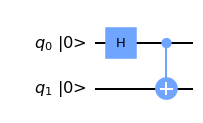

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw('mpl', initial_state=True)

In [3]:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
res = svsim.run(qobj).result()
vec = res.get_statevector()

In [4]:
array_to_latex(vec, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

what happens if we put the second qubit also in superposition?

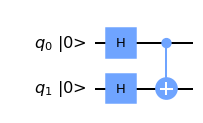

In [5]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0, 1)
qc.draw('mpl', initial_state=True)

In [6]:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
res = svsim.run(qobj).result()
vec = res.get_statevector()

In [7]:
array_to_latex(vec, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

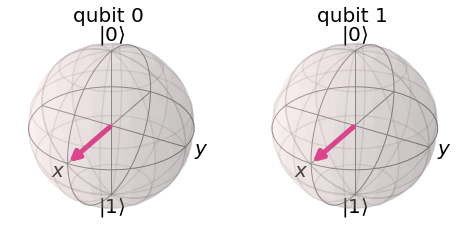

In [8]:
plot_bloch_multivector(vec)

$$ |++> = |00> + |01> + |10> + |11> $$

Let’s put the target qubit in the state |−⟩, so it has a negative phase:

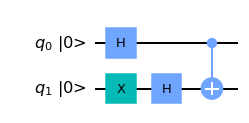

In [9]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.cx(0, 1)
qc.draw('mpl', initial_state=True)

In [10]:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
res = svsim.run(qobj).result()
vec = res.get_statevector()

In [11]:
array_to_latex(vec, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

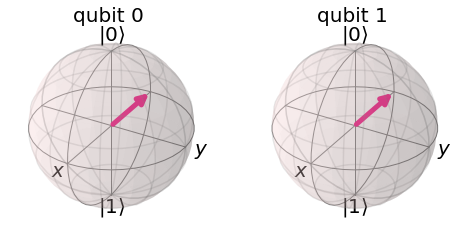

In [12]:
plot_bloch_multivector(vec)

$$ |++> = |00> - |01> - |10> + |11> $$

H-gate transforms |+⟩ → |0⟩ and |−⟩ → |1⟩, we can see that wrapping a CNOT in H-gates has the equivalent behaviour of a CNOT acting in the opposite direction:

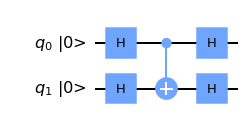

In [13]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0, 1)
qc.h(0)
qc.h(1)
qc.draw('mpl', initial_state=True)

In [14]:
svsim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
res = svsim.run(qobj).result()
um = res.get_unitary()

In [15]:
array_to_latex(um, prefix="\\text{Unitary Matrix} = ")

<IPython.core.display.Latex object>

Now let's apply CNOT with second qbit as control gate. 

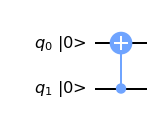

In [16]:
qc = QuantumCircuit(2)
qc.cx(1, 0)
qc.draw('mpl', initial_state=True)

In [17]:
svsim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
res = svsim.run(qobj).result()
um = res.get_unitary()

In [18]:
array_to_latex(um, prefix="\\text{Unitary Matrix} = ")

<IPython.core.display.Latex object>

This identity is an example of phase kickback.

## Phase Kickback

###  Explaining the CNOT Circuit Identity


Kickback is where the eigenvalue added by a gate to a qubit is ‘kicked back’ into a different qubit via a controlled operation. For example, we saw that performing an X-gate on a |−⟩ qubit gives it the phase −1:
<br>
$$ X|-> = X(1/\sqrt{2}(|0> - |1>)) = 1/\sqrt{2}(|1> -|0>) = -|-> $$
<br>
When control qubit in CNOT is in either |0⟩ or |1⟩, this phase affects the whole state, however it is a global phase and has no observable effects:
$$ CNOT|-0> = |-> \mathop{\otimes} |0> = |-0> $$
<br>
$$ CNOT|-1> = X|-> \mathop{\otimes} |1> = -|-> \mathop{\otimes} |1> = -|-1> $$
<br>
<br>
The interesting effect is when our control qubit is in superposition. The component of the control qubit that lies in the direction of |1⟩ applies this phase factor to the corresponding target qubit. This applied phase factor in turn introduces a relative phase into the control qubit:
<br>
$$ CNOT|-+> = 1/\sqrt{2}(CNOT|-0> +CNOT|-1>)  = 1/\sqrt{2}(|-0> - |-1>) = |-> \mathop{\otimes} 1/\sqrt{2}(|0> - |1>) = |--> $$

### Kickback with the T-gate

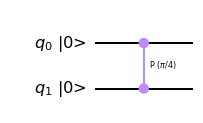

In [19]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
qc.draw('mpl', initial_state=True)

In [20]:
qc.save_unitary()
qobj = assemble(qc)
unitary = svsim.run(qobj).result().get_unitary()

In [21]:
array_to_latex(unitary, prefix="\\text{Controlled-T} = \n")

<IPython.core.display.Latex object>

We can find the matrix of any controlled-U operation using the rule:
<br>
$$ U =  \begin{bmatrix} u_{00} & u_{01} \\ u_{10} & u_{11} \end{bmatrix} $$
<br>
$$ Controlled-U = \begin{bmatrix}I & 0 \\ 0 & U \end{bmatrix} = \begin{bmatrix}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & u_{00} & u_{01} \\ 0 & 0 & u_{10} & u_{11} \end{bmatrix} $$
<br>
<br>
If we apply T-gate to qubit |1>, we add phase $e^{i\pi/4}$ to the qubit:
<br>
$$ T|1> = e^{i\pi/4}|1> $$
<br>
This is global phase and is unobservable.

If we control this operation using another qubit in the |+⟩ state, the phase is no longer global but relative, which changes the relative phase in our control qubit:
<br>
$$ |1+> = |1> \mathop{\otimes} 1/\sqrt{2}(|0> + |1>) = 1/\sqrt{2}(|10> + |11>) $$ 
<br>
$$ Controlled-T|1+⟩ = 1/\sqrt{2} (|10> + e^{i\pi/4}|11>) = |1> \mathop{\otimes} 1/\sqrt{2}(|0> + e^{i\pi/4}|1>) $$
<br>
This has the effect of rotating our control qubit around the Z-axis of the Bloch sphere, while leaving the target qubit unchanged. 

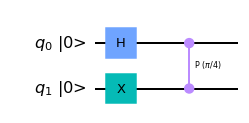

In [22]:
qc = QuantumCircuit(2)
qc.x(1)
qc.h(0)
qc.cp(pi/4, 0, 1)
qc.draw('mpl', initial_state=True)

In [23]:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

In [24]:
array_to_latex(final_state, prefix="\\text{Statevector} = \n")

<IPython.core.display.Latex object>

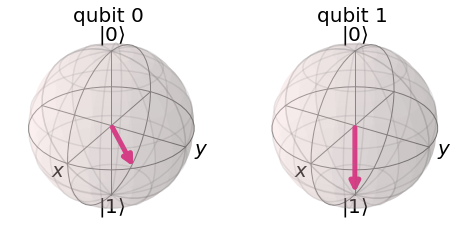

In [26]:
plot_bloch_multivector(final_state)

## Quick Exercises:

1. What would be the resulting state of the control qubit ($q_{0}$) if the target qubit ($q_{1}$) was in the state  |0>?  Use Qiskit to check your answer.

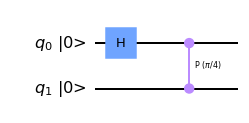

In [28]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cp(pi/4, 0, 1)
qc.draw('mpl', initial_state=True)

In [29]:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

In [30]:
array_to_latex(final_state, prefix="\\text{Statevector} = \n")

<IPython.core.display.Latex object>

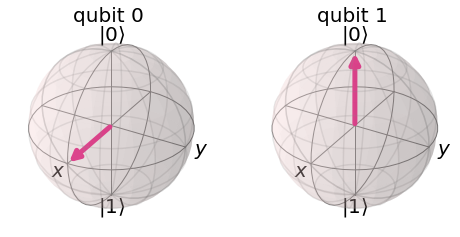

In [31]:
plot_bloch_multivector(final_state)

The resulting state of qubit ($q_{0}$) after applying controlled-T gate is |+>

2. What would happen to the control qubit ($q_{0}$) if the if the target qubit ($q_{1}$) was in the state |1> , and the circuit used a controlled-Sdg gate instead of the controlled-T (as shown in the circuit below)?

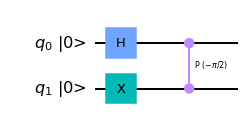

In [32]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cp(-pi/2, 0, 1)
qc.draw('mpl', initial_state=True)

In [33]:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

In [34]:
array_to_latex(final_state, prefix="\\text{Statevector} = \n")

<IPython.core.display.Latex object>

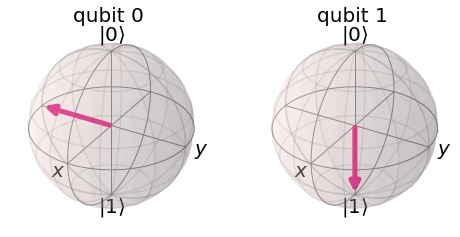

In [35]:
plot_bloch_multivector(final_state)

The qubit ($q_{0}$) after applying controlled-sdg gate will be in state |-i>

3. What would happen to the control qubit ($q_{0}$) if it was in the state |1> instead of the state  before application of the controlled-T?

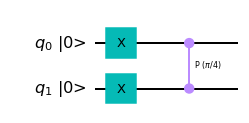

In [36]:
qc = QuantumCircuit(2)
qc.x(0)
qc.x(1)
qc.cp(pi/4, 0, 1)
qc.draw('mpl', initial_state=True)

In [37]:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

In [38]:
array_to_latex(final_state, prefix="\\text{Statevector} = \n")

<IPython.core.display.Latex object>

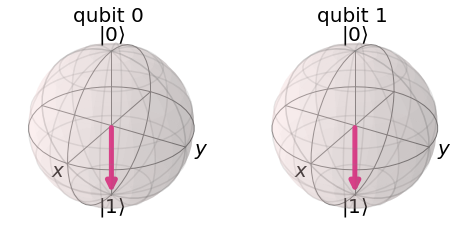

In [39]:
plot_bloch_multivector(final_state)

The qubit ($q_{0}$) after applying controlled-T gate will be in state |1>

In [41]:
import qiskit.tools.jupyter
%qiskit_version_table